# **COVID-19 Dataset**

Idée du code:

- If dossier not exist: Créer dossier de dataset dailies.
- Loop de datetime 1 mars 2020 jusqu'à aujourdhui-3.
    - Dataurl changes with datetime loop
    - No need to download again.

## ***Requirements***

First, we are going to install the following modules:

*   Twarc
*   Tweepy (v. 3.8.0)
*   Argparse (v 3.2)
*   Xtract (v 0.1 a3)
*   Wget (v 3.2)







In [1]:
from IPython.display import clear_output
#!pip install twarc 
#!pip install tweepy 
#!pip install argparse 
#!pip install xtract 
#!pip install wget
#!pip install ipywidgets

## ***Selecting the dataset and language***

The dataset used for this tutorial was downloaded from here:
https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-01-20/2021-01-20_clean-dataset.tsv.gz?raw=true

More datasets can be obtained from here:
https://github.com/thepanacealab/covid19_twitter/tree/master/dailies

The structure of the dataset is made up of the following fields:

*   **tweet_id** *The integer representation of the unique identifier for this Tweet.*
*   **date** *Date when the tweet was posted (YYYY-MM-DD)*
*   **time** *Time when the tweet was posted (HH:mm:ss)*
*   **lang** *Language in which the text is written. Represented by a 2-character language code. If language is unknown, the value will be shown as 'und' (undefined)*
*   **country_code** *Two character string representing the country where the tweet was written. If not known, the field will show as NULL*

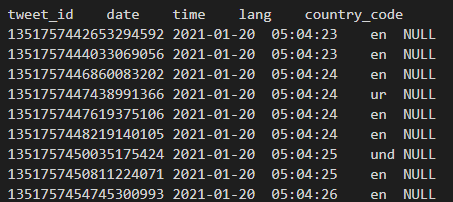

**Filtering a dataset from a language** is done by specifying the language code. More information about language codes can be found here:

https://developer.twitter.com/en/docs/twitter-for-websites/supported-languages

In this example,we are going to filter the dataset, so we can only obtain tweets in spanish (So, that means we are going to use the language code "es")

**IMPORTANT:** In this tutorial, after running the following code, please select the desired language to filter from the dropdown field (which is shown in the output code). If we don't want to filter the dataset, just select "all" in the dropdown field. 

In [2]:
import gzip
import shutil
import os
import wget
import csv
import linecache
from shutil import copyfile
import ipywidgets as widgets
import numpy as np
import pandas as pd
from pathlib import Path
import os
from datetime import date, timedelta


In [3]:
#Get all necessary processing codes from panacealab

!wget https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_acquisition/get_metadata.py -O get_metadata.py
!wget https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_preprocessing/parse_json_lite.py -O parse_json_lite.py
!wget https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_preprocessing/fields.py -O fields.py


--2021-05-31 13:06:12--  https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_acquisition/get_metadata.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7205 (7.0K) [text/plain]
Saving to: 'get_metadata.py'

     0K .......                                               100%  740K=0.01s

2021-05-31 13:06:12 (740 KB/s) - 'get_metadata.py' saved [7205/7205]

--2021-05-31 13:06:12--  https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_preprocessing/parse_json_lite.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

## ***Filtering the dataset by language***

After selecting the desired language, the following code will perform the corresponding filtering to show only the records in the dataset that have the selected language (in a new tsv file called ***clean-dataset-filtered.tsv***). If there's no language filter, no filter process will be taken (but the file name will be ***clean-dataset-filtered.tsv*** anyways)

## ***Introducing our Twitter credentials to authenticate***

Accessing the Twitter APIs requires a set of credentials that you must pass with each request. These credentials can come in different forms depending on the type of authentication that is required by the specific endpoint that you are using. More information: https://developer.twitter.com/en/docs/apps/overview

The credentials can be obtained from the developer portal (https://developer.twitter.com/en/portal/dashboard) and they look like these ones:

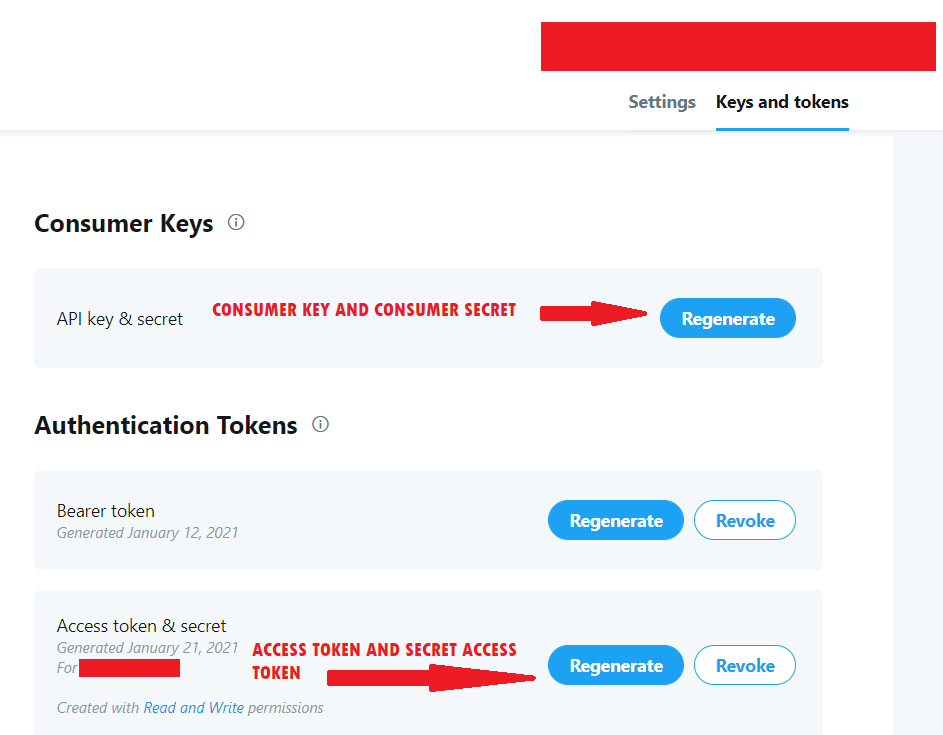

**IMPORTANT:** The following code will also generate an *api_keys.json* (With the twitter credentials entered) that will be required later.  

In [4]:
import json
import tweepy
from tweepy import OAuthHandler


In [1]:

# Authenticate
CONSUMER_KEY = "" #@param {type:"string"}
CONSUMER_SECRET_KEY = "" #@param {type:"string"}
ACCESS_TOKEN_KEY = "" #@param {type:"string"}
ACCESS_TOKEN_SECRET_KEY = "" #@param {type:"string"}

#Creates a JSON Files with the API credentials
with open('api_keys1.json', 'w') as outfile:
    json.dump({
    "consumer_key":CONSUMER_KEY,
    "consumer_secret":CONSUMER_SECRET_KEY,
    "access_token":ACCESS_TOKEN_KEY,
    "access_token_secret": ACCESS_TOKEN_SECRET_KEY
     }, outfile)

#The lines below are just to test if the twitter credentials are correct
# Authenticate
#auth = tweepy.AppAuthHandler(CONSUMER_KEY, CONSUMER_SECRET_KEY)

#api = tweepy.API(auth, wait_on_rate_limit=True,
#				   wait_on_rate_limit_notify=True)

#if (not api):
#    print ("Can't Authenticate")
#    sys.exit(-1)

NameError: name 'json' is not defined

In [6]:
CONSUMER_KEY = ''
CONSUMER_SECRET_KEY = ''
ACCESS_TOKEN_KEY = ''
ACCESS_TOKEN_SECRET_KEY = ''

with open('api_keys2.json', 'w') as outfile:
    json.dump({
    "consumer_key":CONSUMER_KEY,
    "consumer_secret":CONSUMER_SECRET_KEY,
    "access_token":ACCESS_TOKEN_KEY,
    "access_token_secret": ACCESS_TOKEN_SECRET_KEY
     }, outfile)

In [65]:
def df_from_url(date):
    #full_URL=github_URL+str(date+"/"+date)+dataset_URL
    full_input_path = input_parent_dir + str(date) +"/"
    #print(full_URL)
    print(full_input_path)
    #Downloads the dataset (compressed in a GZ format)
    #wget.download(full_URL, out=full_input_path+"clean-dataset.tsv.gz")
    
    #Unzips the dataset and gets the TSV dataset
    with gzip.open(full_input_path+date+"_clean-dataset.tsv.gz", 'rb') as f_in:
        with open(full_input_path+date+"_clean-dataset.tsv", 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
            
    #Deletes the compressed GZ file
    #os.unlink(full_input_path+date+"_clean-dataset.tsv.gz")
    
    #Prepare for french only extraction
    df = pd.read_csv(full_input_path+date+"_clean-dataset.tsv" ,sep="\t")
    lang_list = df.lang.unique()
    lang_list= sorted(np.append(lang_list,'fr'))
    lang_picker = widgets.Dropdown(options=lang_list, value="fr")
    lang_picker
    
    #Creates a new clean dataset with the specified language 
    filtered_language = lang_picker.value
    filtered_tw = list()
    current_line = 1
    with open(full_input_path+date+"_clean-dataset.tsv") as tsvfile:
        tsvreader = csv.reader(tsvfile, delimiter="\t")

        if current_line == 1:
            filtered_tw.append(linecache.getline(full_input_path+date+"_clean-dataset.tsv", current_line))

            for line in tsvreader:
                if line[3] == filtered_language:
                    filtered_tw.append(linecache.getline(full_input_path+date+"_clean-dataset.tsv", current_line))
                current_line += 1
    with open(full_input_path+date+'_clean-dataset-filtered.tsv', 'w') as f_output:
        for item in filtered_tw:
            f_output.write(item)
    fr_df = full_input_path+date+'_clean-dataset-filtered.tsv'
    return full_input_path

In [ ]:
cwd = os.getcwd()
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd,files))

### Extraction directly from  "Cleaned Full Dataset"

# Splitting into multiple csvs.

In [ ]:
input_tsv = "fr_data/full_dataset_clean.tsv"
number_lines = sum(1 for row in (open(input_tsv)))

rowsize = 10000000

for i in range(1, number_lines, rowsize)

In [ ]:
#csv file name to be read in 
in_csv = 'input.csv'
#get the number of lines of the csv file to be read

number_lines = sum(1 for row in (open(in_csv)))

#size of rows of data to write to the csv, 

#you can change the row size according to your need
rowsize = 500
#start looping through data writing it to a new file for each set
for i in range(1,number_lines,rowsize):
    df = pd.read_csv(in_csv,
          header=None,
          nrows = rowsize,#number of rows to read at each loop
          skiprows = i)#skip rows that have been read
    #csv to write data to a new file with indexed name. input_1.csv etc.
    out_csv = 'input' + str(i) + '.csv'
    df.to_csv(out_csv,
          index=False,
          header=False,
          mode='a',#append data to csv file
          chunksize=rowsize)#size of data to append for each loop

In [ ]:
#Unzips the dataset and gets the TSV dataset
with gzip.open("fr_data/full_dataset_clean.tsv.gz", 'rb') as f_in:
    with open("fr_data/full_dataset_clean.tsv", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
        
#Deletes the compressed GZ file
#os.unlink("full_dataset_clean.tsv.gz")

#Prepare for french only extraction
df = pd.read_csv("fr_data/full_dataset_clean.tsv" ,sep="\t")
lang_list = df.lang.unique()
lang_list= sorted(np.append(lang_list,'fr'))
lang_picker = widgets.Dropdown(options=lang_list, value="fr")
lang_picker

#Creates a new clean dataset with the specified language 
filtered_language = lang_picker.value
filtered_tw = list()
current_line = 1
with open("fr_data/full_dataset_clean.tsv") as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    if current_line == 1:
        filtered_tw.append(linecache.getline("fr_data/full_dataset_cleant.tsv", current_line))
        for line in tsvreader:
            if line[3] == filtered_language:
                filtered_tw.append(linecache.getline("fr_data/full_dataset_clean.tsv", current_line))
            current_line += 1
with open('fr_data/full_dataset_clean_filtered.tsv', 'w') as f_output:
    for item in filtered_tw:
        f_output.write(item)

In [ ]:
!python get_metadata.py -i fr_data/full_dataset_clean.tsv -o fr_data/hydrated_tweets -k api_keys.json

In [10]:
full_df = pd.read_csv("fr_data/full_dataset_clean.tsv", sep='\t')

In [11]:
french_df = full_df[full_df['lang']=='fr']

In [12]:
french_df.to_csv("fr_data/french_dataset_clean.tsv", sep='\t' ,index=False)

In [8]:
!python get_metadata.py -i fr_data/french_dataset_clean_3.tsv -o fr_data/hydrated_fr_tweets03 -k api_keys1.json

Your twitter api credentials are valid.

Traceback (most recent call last):
  File "get_metadata.py", line 186, in <module>
    main()
  File "get_metadata.py", line 182, in main
    f.writerow([data["favorite_count"], data["source"], data["text"].encode('utf-8'), data["in_reply_to_screen_name"], data["is_retweet"], data["created_at"], data["retweet_count"], data["id_str"].encode('utf-8')])
  File "C:\Users\sbens\Miniconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u039f' in position 16: character maps to <undefined>



fr_data/hydrated_fr_tweets03
tab seperated file, using \t delimiter
total ids: 1000000
metadata collection complete
creating master json file
currently getting 0 - 100
currently getting 100 - 200
currently getting 200 - 300
currently getting 300 - 400
currently getting 400 - 500
currently getting 500 - 600
currently getting 600 - 700
currently getting 700 - 800
currently getting 800 - 900
currently getting 900 - 1000
currently getting 1000 - 1100
currently getting 1100 - 1200
currently getting 1200 - 1300
currently getting 1300 - 1400
currently getting 1400 - 1500
currently getting 1500 - 1600
currently getting 1600 - 1700
currently getting 1700 - 1800
currently getting 1800 - 1900
currently getting 1900 - 2000
currently getting 2000 - 2100
currently getting 2100 - 2200
currently getting 2200 - 2300
currently getting 2300 - 2400
currently getting 2400 - 2500
currently getting 2500 - 2600
currently getting 2600 - 2700
currently getting 2700 - 2800
currently getting 2800 - 2900
currentl

In [7]:
!python get_metadata.py -i fr_data/fr_dataset01.tsv -o fr_data/hydrated_fr_tweets01 -k api_keys2.json

Your twitter api credentials are valid.
fr_data/hydrated_fr_tweets01
tab seperated file, using \t delimiter


Traceback (most recent call last):
  File "get_metadata.py", line 186, in <module>
    main()
  File "get_metadata.py", line 85, in main
    inputfile_data = inputfile_data.set_index('tweet_id')
  File "C:\Users\sbens\Miniconda3\lib\site-packages\pandas\core\frame.py", line 4727, in set_index
    raise KeyError(f"None of {missing} are in the columns")
KeyError: "None of ['tweet_id'] are in the columns"


In [ ]:
!python get_metadata.py -i fr_data/french_dataset_clean_5.tsv -o fr_data/hydrated_fr_tweets05 -k api_keys1.json

currently getting 18200 - 18300
currently getting 18300 - 18400
currently getting 18400 - 18500
currently getting 18500 - 18600
currently getting 18600 - 18700
currently getting 18700 - 18800
currently getting 18800 - 18900
currently getting 18900 - 19000
currently getting 19000 - 19100
currently getting 19100 - 19200
currently getting 19200 - 19300
currently getting 19300 - 19400
currently getting 19400 - 19500
currently getting 19500 - 19600
currently getting 19600 - 19700
currently getting 19700 - 19800
currently getting 19800 - 19900
currently getting 19900 - 20000
currently getting 20000 - 20100
currently getting 20100 - 20200
currently getting 20200 - 20300
currently getting 20300 - 20400
currently getting 20400 - 20500
currently getting 20500 - 20600
currently getting 20600 - 20700
currently getting 20700 - 20800
currently getting 20800 - 20900
currently getting 20900 - 21000
currently getting 21000 - 21100
currently getting 21100 - 21200
currently getting 21200 - 21300
currentl

currently getting 73300 - 73400
currently getting 73400 - 73500
currently getting 73500 - 73600
currently getting 73600 - 73700
currently getting 73700 - 73800
currently getting 73800 - 73900
currently getting 73900 - 74000
currently getting 74000 - 74100
currently getting 74100 - 74200
currently getting 74200 - 74300
currently getting 74300 - 74400
currently getting 74400 - 74500
currently getting 74500 - 74600
currently getting 74600 - 74700
currently getting 74700 - 74800
currently getting 74800 - 74900
currently getting 74900 - 75000
currently getting 75000 - 75100
currently getting 75100 - 75200
currently getting 75200 - 75300
currently getting 75300 - 75400
currently getting 75400 - 75500
currently getting 75500 - 75600
currently getting 75600 - 75700
currently getting 75700 - 75800
currently getting 75800 - 75900
currently getting 75900 - 76000
currently getting 76000 - 76100
currently getting 76100 - 76200
currently getting 76200 - 76300
currently getting 76300 - 76400
currentl

currently getting 114200 - 114300
currently getting 114300 - 114400
currently getting 114400 - 114500
currently getting 114500 - 114600
Caught the TweepError exception:
 Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/lookup.json?id=1251621167431114753%2C1251621170367156225%2C1251621171533152261%2C1251621187458945024%2C1251621196921286656%2C1251621201316851716%2C1251621216454160384%2C1251621217121034240%2C1251621225002078209%2C1251621233621372929%2C1251621239044673536%2C1251621252130918406%2C1251621255708643329%2C1251621260049743882%2C1251621291863531526%2C1251621292840714244%2C1251621335907938307%2C1251621338793607170%2C1251621339594719232%2C1251621343583404035%2C1251621364718600193%2C1251621367633584128%2C1251621372876541953%2C1251621386147311616%2C1251621426832060416%2C1251621435589775363%2C1251621444452323328%2C1251621452295614466%2C1251621456229908484%2C1251621460436824064%2C1251621461556633606%2C125162148

currently getting 152200 - 152300
currently getting 152300 - 152400
currently getting 152400 - 152500
currently getting 152500 - 152600
currently getting 152600 - 152700
currently getting 152700 - 152800
currently getting 152800 - 152900
currently getting 152900 - 153000
currently getting 153000 - 153100
currently getting 153100 - 153200
currently getting 153200 - 153300
currently getting 153300 - 153400
currently getting 153400 - 153500
currently getting 153500 - 153600
currently getting 153600 - 153700
currently getting 153700 - 153800
currently getting 153800 - 153900
currently getting 153900 - 154000
currently getting 154000 - 154100
currently getting 154100 - 154200
currently getting 154200 - 154300
currently getting 154300 - 154400
currently getting 154400 - 154500
currently getting 154500 - 154600
currently getting 154600 - 154700
currently getting 154700 - 154800
currently getting 154800 - 154900
currently getting 154900 - 155000
currently getting 155000 - 155100
currently gett

Caught the TweepError exception:
 Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/lookup.json?id=1252336366400057344%2C1252336367712923650%2C1252336400806092800%2C1252336404144807938%2C1252336413875601410%2C1252336417335721984%2C1252336421433520130%2C1252336424956751872%2C1252336430535196672%2C1252336434704338946%2C1252336442598133763%2C1252336458532151296%2C1252336459220213767%2C1252336459551473665%2C1252336462831538176%2C1252336468594475009%2C1252336484469727232%2C1252336517822976000%2C1252336518640758785%2C1252336521748701184%2C1252336526597468166%2C1252336531324297216%2C1252336535417942018%2C1252336538899214338%2C1252336539402715137%2C1252336539457122305%2C1252336542766555136%2C1252336542867091465%2C1252336546595782656%2C1252336556443971585%2C1252336572105547776%2C1252336572164235266%2C1252336576635510785%2C1252336601583288323%2C1252336601822302208%2C1252336605500768257%2C1252336610152046593%2C1252336610387

 Failed to send request: ("Connection broken: ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None)", ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
currently getting 276500 - 276600
currently getting 276600 - 276700
currently getting 276700 - 276800
currently getting 276800 - 276900
currently getting 276900 - 277000
currently getting 277000 - 277100
currently getting 277100 - 277200
currently getting 277200 - 277300
currently getting 277300 - 277400
currently getting 277400 - 277500
currently getting 277500 - 277600
currently getting 277600 - 277700
currently getting 277700 - 277800
currently getting 277800 - 277900
currently getting 277900 - 278000
currently getting 278000 - 278100
currently getting 278100 - 278200
currently getting 278200 - 278300
currently getting 278300 - 278400
Caught the TweepError exception:
 Failed to send request: ('Connection aborted.', Con

Caught the TweepError exception:
 Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/lookup.json?id=1253159819453792258%2C1253159849782906880%2C1253159877024911360%2C1253159941587849218%2C1253159999888592897%2C1253160044075548673%2C1253160045589774336%2C1253160066783592449%2C1253160095023878145%2C1253160107875106817%2C1253160114585874433%2C1253160238922039298%2C1253160272652632066%2C1253160283062833157%2C1253160360883838977%2C1253160396749516800%2C1253160433789403143%2C1253160451870994437%2C1253160464013496321%2C1253160471609384968%2C1253160472657956864%2C1253160492765310982%2C1253160494463987712%2C1253160498222137345%2C1253160501854433280%2C1253160505914482689%2C1253160507688673280%2C1253160507852361728%2C1253160509529927681%2C1253160530224676864%2C1253160556334383105%2C1253160568191475712%2C1253160597572681729%2C1253160631437611009%2C1253160633773830144%2C1253160719052345345%2C1253160741441503235%2C1253160742053

currently getting 319700 - 319800
currently getting 319800 - 319900
currently getting 319900 - 320000
currently getting 320000 - 320100
currently getting 320100 - 320200
currently getting 320200 - 320300
currently getting 320300 - 320400
currently getting 320400 - 320500
currently getting 320500 - 320600
currently getting 320600 - 320700
currently getting 320700 - 320800
currently getting 320800 - 320900
currently getting 320900 - 321000
currently getting 321000 - 321100
currently getting 321100 - 321200
currently getting 321200 - 321300
Caught the TweepError exception:
 Failed to send request: ("Connection broken: ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None)", ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
currently getting 321300 - 321400
currently getting 321400 - 321500
currently getting 321500 - 321600
currently getting 321600 - 321700
currently getting 

currently getting 372900 - 373000
currently getting 373000 - 373100
currently getting 373100 - 373200
currently getting 373200 - 373300
currently getting 373300 - 373400
currently getting 373400 - 373500
currently getting 373500 - 373600
currently getting 373600 - 373700
currently getting 373700 - 373800
Caught the TweepError exception:
 Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
currently getting 373800 - 373900
currently getting 373900 - 374000
currently getting 374000 - 374100
currently getting 374100 - 374200
currently getting 374200 - 374300
currently getting 374300 - 374400
currently getting 374400 - 374500
currently getting 374500 - 374600
currently getting 374600 - 374700
currently getting 374700 - 374800
currently getting 374800 - 374900
currently getting 374900 - 375000
currently getting 375000 - 375100
currently getting 375100 - 375200
currently getting 375200 

currently getting 431200 - 431300
currently getting 431300 - 431400
currently getting 431400 - 431500
Caught the TweepError exception:
 Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/lookup.json?id=1254163808945410049%2C1254163816633511942%2C1254163824900558848%2C1254163833293332480%2C1254163841535152136%2C1254163856068403202%2C1254163873055285250%2C1254163880227594241%2C1254163883419488257%2C1254163883566211075%2C1254163884858134528%2C1254163888247115785%2C1254163897537495041%2C1254163906991448064%2C1254163909935878145%2C1254163930555039744%2C1254163939102994433%2C1254163972401528832%2C1254163988616810499%2C1254163997387087876%2C1254164014516637703%2C1254164020447379458%2C1254164023756632073%2C1254164025849663494%2C1254164027699335168%2C1254164030689812482%2C1254164044342231040%2C1254164044849786880%2C1254164044879142912%2C1254164048142381056%2C1254164056992251907%2C1254164069122269189%2C1254164070451773440%2

currently getting 487900 - 488000
currently getting 488000 - 488100
currently getting 488100 - 488200
currently getting 488200 - 488300
currently getting 488300 - 488400
currently getting 488400 - 488500
currently getting 488500 - 488600
currently getting 488600 - 488700
currently getting 488700 - 488800
currently getting 488800 - 488900
currently getting 488900 - 489000
currently getting 489000 - 489100
currently getting 489100 - 489200
currently getting 489200 - 489300
currently getting 489300 - 489400
currently getting 489400 - 489500
currently getting 489500 - 489600
currently getting 489600 - 489700
currently getting 489700 - 489800
currently getting 489800 - 489900
currently getting 489900 - 490000
Caught the TweepError exception:
 Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/lookup.json?id=1254685347142918144%2C1254685347226750978%2C1254685354529038338%2C1254685355137282049%2C1254685358496927745%2C125

currently getting 519900 - 520000
currently getting 520000 - 520100
currently getting 520100 - 520200
currently getting 520200 - 520300
currently getting 520300 - 520400
currently getting 520400 - 520500
currently getting 520500 - 520600
currently getting 520600 - 520700
currently getting 520700 - 520800
currently getting 520800 - 520900
currently getting 520900 - 521000
currently getting 521000 - 521100
currently getting 521100 - 521200
currently getting 521200 - 521300
currently getting 521300 - 521400
currently getting 521400 - 521500
Caught the TweepError exception:
 Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/lookup.json?id=1254887673690456064%2C1254887686428659713%2C1254887700005609473%2C1254887703344287747%2C1254887704254390274%2C1254887726144356354%2C1254887728342237186%2C1254887729093136387%2C1254887740585521152%2C1254887745849364484%2C1254887745928998914%2C1254887769798840320%2C1254887775603699712

currently getting 551600 - 551700
currently getting 551700 - 551800
currently getting 551800 - 551900
currently getting 551900 - 552000
currently getting 552000 - 552100
currently getting 552100 - 552200
currently getting 552200 - 552300
currently getting 552300 - 552400
currently getting 552400 - 552500
currently getting 552500 - 552600
currently getting 552600 - 552700
currently getting 552700 - 552800
currently getting 552800 - 552900
currently getting 552900 - 553000
currently getting 553000 - 553100
currently getting 553100 - 553200
currently getting 553200 - 553300
currently getting 553300 - 553400
currently getting 553400 - 553500
currently getting 553500 - 553600
currently getting 553600 - 553700
currently getting 553700 - 553800
Caught the TweepError exception:
 Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/lookup.json?id=1255132297822531585%2C1255132298757824514%2C1255132302985900033%2C1255132315098

currently getting 630100 - 630200
currently getting 630200 - 630300
currently getting 630300 - 630400
currently getting 630400 - 630500
Caught the TweepError exception:
 Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/lookup.json?id=1255741919663132678%2C1255741932988518400%2C1255741940764721153%2C1255741945424556042%2C1255741955058909185%2C1255741956564623360%2C1255741960410869760%2C1255741972884709376%2C1255742003771564032%2C1255742006107742213%2C1255742024176803842%2C1255742038152265728%2C1255742048226902016%2C1255742062357405696%2C1255742062583898112%2C1255742063955578882%2C1255742065482371073%2C1255742066488901637%2C1255742067134926848%2C1255742071966760960%2C1255742073099206657%2C1255742075800375296%2C1255742079587713025%2C1255742081697558531%2C1255742084251877376%2C1255742091008847872%2C1255742094448214024%2C1255742094913810432%2C1255742095501012998%2C1255742098252464134%2C1255742104837505025%2C125574210

currently getting 681900 - 682000
currently getting 682000 - 682100
currently getting 682100 - 682200
currently getting 682200 - 682300
currently getting 682300 - 682400
currently getting 682400 - 682500
currently getting 682500 - 682600
currently getting 682600 - 682700
currently getting 682700 - 682800
currently getting 682800 - 682900
currently getting 682900 - 683000
currently getting 683000 - 683100
currently getting 683100 - 683200
currently getting 683200 - 683300
currently getting 683300 - 683400
currently getting 683400 - 683500
currently getting 683500 - 683600
currently getting 683600 - 683700
Caught the TweepError exception:
 Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
currently getting 683700 - 683800
currently getting 683800 - 683900
currently getting 683900 - 684000
currently getting 684000 - 684100
currently getting 684100 - 684200
currently getting 684200 

currently getting 714100 - 714200
currently getting 714200 - 714300
currently getting 714300 - 714400
currently getting 714400 - 714500
currently getting 714500 - 714600
currently getting 714600 - 714700
currently getting 714700 - 714800
currently getting 714800 - 714900
currently getting 714900 - 715000
currently getting 715000 - 715100
currently getting 715100 - 715200
currently getting 715200 - 715300
currently getting 715300 - 715400
Caught the TweepError exception:
 Failed to send request: ("Connection broken: ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None)", ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
currently getting 715400 - 715500
currently getting 715500 - 715600
currently getting 715600 - 715700
currently getting 715700 - 715800
Caught the TweepError exception:
 Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max ret

currently getting 762100 - 762200
currently getting 762200 - 762300
currently getting 762300 - 762400
Caught the TweepError exception:
 Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/lookup.json?id=1256888803261911040%2C1256888804046241792%2C1256888808177623041%2C1256888821570064384%2C1256888822933192704%2C1256888824824836096%2C1256888828255703041%2C1256888832630427648%2C1256888835071508480%2C1256888836870877186%2C1256888841404928001%2C1256888852565942272%2C1256888853018927106%2C1256888853807476736%2C1256888874082734081%2C1256888876599304192%2C1256888879174553600%2C1256888880936165377%2C1256888882618122241%2C1256888883545100289%2C1256888887537999872%2C1256888890276941825%2C1256888898518568961%2C1256888898757832705%2C1256888900024483840%2C1256888904952745984%2C1256888905263206401%2C1256888918554927105%2C1256888918630375429%2C1256888925328683008%2C1256888938213580800%2C1256888943452270593%2C1256888944467357696%2

currently getting 843100 - 843200
currently getting 843200 - 843300
currently getting 843300 - 843400
currently getting 843400 - 843500
currently getting 843500 - 843600
currently getting 843600 - 843700
currently getting 843700 - 843800
currently getting 843800 - 843900
currently getting 843900 - 844000
currently getting 844000 - 844100
currently getting 844100 - 844200
Caught the TweepError exception:
 Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/lookup.json?id=1257581356042903554%2C1257581357963804672%2C1257581359788408833%2C1257581360828633089%2C1257581363500322817%2C1257581366960676865%2C1257581369519009792%2C1257581373658992641%2C1257581379409281027%2C1257581379413475328%2C1257581385788899328%2C1257581387311448071%2C1257581388943036418%2C1257581392206147590%2C1257581399089053696%2C1257581400808701953%2C1257581407192391680%2C1257581408043794432%2C1257581408975011840%2C1257581412418498560%2C1257581421268

currently getting 849300 - 849400
Caught the TweepError exception:
 Failed to send request: ("Connection broken: ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None)", ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
currently getting 849400 - 849500
currently getting 849500 - 849600
currently getting 849600 - 849700
currently getting 849700 - 849800
currently getting 849800 - 849900
Caught the TweepError exception:
 Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/lookup.json?id=1257606787542519809%2C1257606789794877444%2C1257606790843437057%2C1257606791506079745%2C1257606794412769280%2C1257606794899329024%2C1257606796858064898%2C1257606799756333059%2C1257606800117022720%2C1257606803631869952%2C1257606831565914113%2C1257606834652938240%2C1257606838461370370%2C1257606838750756864%2C1257606841191

currently getting 875100 - 875200
currently getting 875200 - 875300
currently getting 875300 - 875400
currently getting 875400 - 875500
currently getting 875500 - 875600
currently getting 875600 - 875700
currently getting 875700 - 875800
currently getting 875800 - 875900
currently getting 875900 - 876000
currently getting 876000 - 876100
currently getting 876100 - 876200
currently getting 876200 - 876300
currently getting 876300 - 876400
currently getting 876400 - 876500
currently getting 876500 - 876600
currently getting 876600 - 876700
Caught the TweepError exception:
 Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/lookup.json?id=1257821012298731527%2C1257821037603012609%2C1257821046197100550%2C1257821079856386048%2C1257821094666477573%2C1257821104363769862%2C1257821105210998786%2C1257821108293693440%2C1257821120234950656%2C1257821123649077250%2C1257821131907772416%2C1257821158159847426%2C1257821165671809025

currently getting 929200 - 929300
currently getting 929300 - 929400
currently getting 929400 - 929500
currently getting 929500 - 929600
currently getting 929600 - 929700
currently getting 929700 - 929800
currently getting 929800 - 929900
currently getting 929900 - 930000
currently getting 930000 - 930100
currently getting 930100 - 930200
Caught the TweepError exception:
 Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/lookup.json?id=1258284683344969729%2C1258284687191150593%2C1258284691624517633%2C1258284698024935424%2C1258284699740340224%2C1258284702764580864%2C1258284707311226880%2C1258284717054537728%2C1258284717381750784%2C1258284720498126848%2C1258284726734827527%2C1258284735693979648%2C1258284739024355329%2C1258284741695922178%2C1258284751464681474%2C1258284752483860480%2C1258284755306582016%2C1258284756967424000%2C1258284758657839107%2C1258284760406855681%2C1258284766878732288%2C1258284766924869632%2C125

currently getting 971900 - 972000
currently getting 972000 - 972100
Caught the TweepError exception:
 Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/lookup.json?id=1258566527214903303%2C1258566529169395714%2C1258566531870601223%2C1258566562275000322%2C1258566562967150592%2C1258566738595074048%2C1258566739387994112%2C1258566740797161472%2C1258566743041150977%2C1258566770446807041%2C1258566830240739334%2C1258566858132860931%2C1258566860561362949%2C1258566861379325953%2C1258566862142611456%2C1258566863103107073%2C1258566897538338816%2C1258566912436506625%2C1258566924654596098%2C1258566927535898624%2C1258566927775129605%2C1258566930903920641%2C1258566975472586752%2C1258566975854465030%2C1258567019143868418%2C1258567085107675136%2C1258567086034518024%2C1258567124559163393%2C1258567128501891072%2C1258567136332713984%2C1258567138199121926%2C1258567143559294977%2C1258567153277599751%2C1258567156284915713%2C12585671602

In [5]:
!python get_metadata.py -i fr_data/french_dataset_clean_7.tsv -o fr_data/hydrated_fr_tweets07 -k api_keys2.json

currently getting 12300 - 12400
currently getting 12400 - 12500
currently getting 12500 - 12600
currently getting 12600 - 12700
currently getting 12700 - 12800
currently getting 12800 - 12900
currently getting 12900 - 13000
currently getting 13000 - 13100
currently getting 13100 - 13200
currently getting 13200 - 13300
currently getting 13300 - 13400
currently getting 13400 - 13500
Caught the TweepError exception:
 Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
currently getting 13500 - 13600
currently getting 13600 - 13700
currently getting 13700 - 13800
currently getting 13800 - 13900
currently getting 13900 - 14000
currently getting 14000 - 14100
currently getting 14100 - 14200
currently getting 14200 - 14300
currently getting 14300 - 14400
currently getting 14400 - 14500
currently getting 14500 - 14600
currently getting 14600 - 14700
currently getting 14700 - 14800
current

currently getting 150900 - 151000
currently getting 151000 - 151100
currently getting 151100 - 151200
currently getting 151200 - 151300
currently getting 151300 - 151400
currently getting 151400 - 151500
currently getting 151500 - 151600
currently getting 151600 - 151700
currently getting 151700 - 151800
currently getting 151800 - 151900
currently getting 151900 - 152000
currently getting 152000 - 152100
currently getting 152100 - 152200
currently getting 152200 - 152300
currently getting 152300 - 152400
currently getting 152400 - 152500
currently getting 152500 - 152600
currently getting 152600 - 152700
currently getting 152700 - 152800
currently getting 152800 - 152900
currently getting 152900 - 153000
currently getting 153000 - 153100
currently getting 153100 - 153200
currently getting 153200 - 153300
currently getting 153300 - 153400
currently getting 153400 - 153500
currently getting 153500 - 153600
currently getting 153600 - 153700
currently getting 153700 - 153800
currently gett

currently getting 176600 - 176700
currently getting 176700 - 176800
currently getting 176800 - 176900
currently getting 176900 - 177000
currently getting 177000 - 177100
currently getting 177100 - 177200
currently getting 177200 - 177300
currently getting 177300 - 177400
currently getting 177400 - 177500
currently getting 177500 - 177600
currently getting 177600 - 177700
currently getting 177700 - 177800
currently getting 177800 - 177900
currently getting 177900 - 178000
currently getting 178000 - 178100
currently getting 178100 - 178200
currently getting 178200 - 178300
currently getting 178300 - 178400
currently getting 178400 - 178500
currently getting 178500 - 178600
currently getting 178600 - 178700
currently getting 178700 - 178800
currently getting 178800 - 178900
currently getting 178900 - 179000
currently getting 179000 - 179100
currently getting 179100 - 179200
currently getting 179200 - 179300
currently getting 179300 - 179400
currently getting 179400 - 179500
currently gett

currently getting 289300 - 289400
currently getting 289400 - 289500
currently getting 289500 - 289600
currently getting 289600 - 289700
currently getting 289700 - 289800
currently getting 289800 - 289900
currently getting 289900 - 290000
currently getting 290000 - 290100
currently getting 290100 - 290200
currently getting 290200 - 290300
currently getting 290300 - 290400
currently getting 290400 - 290500
currently getting 290500 - 290600
currently getting 290600 - 290700
currently getting 290700 - 290800
currently getting 290800 - 290900
currently getting 290900 - 291000
currently getting 291000 - 291100
currently getting 291100 - 291200
currently getting 291200 - 291300
currently getting 291300 - 291400
currently getting 291400 - 291500
currently getting 291500 - 291600
currently getting 291600 - 291700
currently getting 291700 - 291800
currently getting 291800 - 291900
currently getting 291900 - 292000
currently getting 292000 - 292100
currently getting 292100 - 292200
currently gett

currently getting 314400 - 314500
currently getting 314500 - 314600
currently getting 314600 - 314700
currently getting 314700 - 314800
currently getting 314800 - 314900
currently getting 314900 - 315000
currently getting 315000 - 315100
currently getting 315100 - 315200
currently getting 315200 - 315300
currently getting 315300 - 315400
currently getting 315400 - 315500
currently getting 315500 - 315600
currently getting 315600 - 315700
currently getting 315700 - 315800
currently getting 315800 - 315900
currently getting 315900 - 316000
currently getting 316000 - 316100
currently getting 316100 - 316200
currently getting 316200 - 316300
currently getting 316300 - 316400
currently getting 316400 - 316500
currently getting 316500 - 316600
currently getting 316600 - 316700
currently getting 316700 - 316800
currently getting 316800 - 316900
currently getting 316900 - 317000
currently getting 317000 - 317100
currently getting 317100 - 317200
currently getting 317200 - 317300
currently gett

currently getting 456900 - 457000
currently getting 457000 - 457100
currently getting 457100 - 457200
currently getting 457200 - 457300
currently getting 457300 - 457400
currently getting 457400 - 457500
currently getting 457500 - 457600
currently getting 457600 - 457700
currently getting 457700 - 457800
currently getting 457800 - 457900
currently getting 457900 - 458000
currently getting 458000 - 458100
currently getting 458100 - 458200
currently getting 458200 - 458300
currently getting 458300 - 458400
currently getting 458400 - 458500
currently getting 458500 - 458600
currently getting 458600 - 458700
currently getting 458700 - 458800
currently getting 458800 - 458900
currently getting 458900 - 459000
currently getting 459000 - 459100
currently getting 459100 - 459200
currently getting 459200 - 459300
currently getting 459300 - 459400
currently getting 459400 - 459500
currently getting 459500 - 459600
currently getting 459600 - 459700
currently getting 459700 - 459800
currently gett

currently getting 474500 - 474600
currently getting 474600 - 474700
currently getting 474700 - 474800
currently getting 474800 - 474900
currently getting 474900 - 475000
currently getting 475000 - 475100
currently getting 475100 - 475200
currently getting 475200 - 475300
currently getting 475300 - 475400
currently getting 475400 - 475500
currently getting 475500 - 475600
currently getting 475600 - 475700
currently getting 475700 - 475800
currently getting 475800 - 475900
currently getting 475900 - 476000
currently getting 476000 - 476100
currently getting 476100 - 476200
currently getting 476200 - 476300
currently getting 476300 - 476400
currently getting 476400 - 476500
currently getting 476500 - 476600
currently getting 476600 - 476700
currently getting 476700 - 476800
currently getting 476800 - 476900
currently getting 476900 - 477000
currently getting 477000 - 477100
currently getting 477100 - 477200
currently getting 477200 - 477300
currently getting 477300 - 477400
currently gett

currently getting 499600 - 499700
currently getting 499700 - 499800
currently getting 499800 - 499900
Caught the TweepError exception:
 Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
currently getting 499900 - 500000
currently getting 500000 - 500100
Caught the TweepError exception:
 Failed to send request: ("Connection broken: ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None)", ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
currently getting 500100 - 500200
currently getting 500200 - 500300
currently getting 500300 - 500400
currently getting 500400 - 500500
currently getting 500500 - 500600
currently getting 500600 - 500700
currently getting 500700 - 500800
currently getting 500800 - 500900
currently getting 500900 - 501000
currently getting 501000 - 50

currently getting 615700 - 615800
Caught the TweepError exception:
 Failed to send request: ("Connection broken: ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None)", ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
currently getting 615800 - 615900
currently getting 615900 - 616000
currently getting 616000 - 616100
currently getting 616100 - 616200
currently getting 616200 - 616300
currently getting 616300 - 616400
currently getting 616400 - 616500
currently getting 616500 - 616600
currently getting 616600 - 616700
currently getting 616700 - 616800
currently getting 616800 - 616900
currently getting 616900 - 617000
currently getting 617000 - 617100
currently getting 617100 - 617200
currently getting 617200 - 617300
currently getting 617300 - 617400
currently getting 617400 - 617500
currently getting 617500 - 617600
currently getting 617600 - 617700
currently getting 

currently getting 641900 - 642000
currently getting 642000 - 642100
currently getting 642100 - 642200
currently getting 642200 - 642300
currently getting 642300 - 642400
currently getting 642400 - 642500
currently getting 642500 - 642600
currently getting 642600 - 642700
currently getting 642700 - 642800
currently getting 642800 - 642900
currently getting 642900 - 643000
currently getting 643000 - 643100
currently getting 643100 - 643200
currently getting 643200 - 643300
currently getting 643300 - 643400
currently getting 643400 - 643500
currently getting 643500 - 643600
currently getting 643600 - 643700
currently getting 643700 - 643800
currently getting 643800 - 643900
currently getting 643900 - 644000
currently getting 644000 - 644100
currently getting 644100 - 644200
currently getting 644200 - 644300
currently getting 644300 - 644400
currently getting 644400 - 644500
currently getting 644500 - 644600
currently getting 644600 - 644700
currently getting 644700 - 644800
Caught the Twe

currently getting 773500 - 773600
currently getting 773600 - 773700
currently getting 773700 - 773800
currently getting 773800 - 773900
currently getting 773900 - 774000
currently getting 774000 - 774100
currently getting 774100 - 774200
currently getting 774200 - 774300
currently getting 774300 - 774400
currently getting 774400 - 774500
currently getting 774500 - 774600
currently getting 774600 - 774700
Caught the TweepError exception:
 Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
currently getting 774700 - 774800
currently getting 774800 - 774900
currently getting 774900 - 775000
Caught the TweepError exception:
 Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
currently getting 775000 - 775100
currently getting 775100 - 775200
currently getting 775200 - 775300
cu

currently getting 805300 - 805400
currently getting 805400 - 805500
currently getting 805500 - 805600
currently getting 805600 - 805700
currently getting 805700 - 805800
currently getting 805800 - 805900
currently getting 805900 - 806000
currently getting 806000 - 806100
currently getting 806100 - 806200
currently getting 806200 - 806300
currently getting 806300 - 806400
currently getting 806400 - 806500
currently getting 806500 - 806600
currently getting 806600 - 806700
currently getting 806700 - 806800
currently getting 806800 - 806900
currently getting 806900 - 807000
currently getting 807000 - 807100
currently getting 807100 - 807200
currently getting 807200 - 807300
currently getting 807300 - 807400
currently getting 807400 - 807500
currently getting 807500 - 807600
currently getting 807600 - 807700
currently getting 807700 - 807800
currently getting 807800 - 807900
currently getting 807900 - 808000
currently getting 808000 - 808100
currently getting 808100 - 808200
currently gett

currently getting 962600 - 962700
currently getting 962700 - 962800
currently getting 962800 - 962900
currently getting 962900 - 963000
currently getting 963000 - 963100
currently getting 963100 - 963200
currently getting 963200 - 963300
currently getting 963300 - 963400
currently getting 963400 - 963500
currently getting 963500 - 963600
currently getting 963600 - 963700
currently getting 963700 - 963800
currently getting 963800 - 963900
currently getting 963900 - 964000
currently getting 964000 - 964100
Caught the TweepError exception:
 Failed to send request: ("Connection broken: ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None)", ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
currently getting 964100 - 964200
currently getting 964200 - 964300
currently getting 964300 - 964400
currently getting 964400 - 964500
currently getting 964500 - 964600
currently getting 

currently getting 995100 - 995200
currently getting 995200 - 995300
currently getting 995300 - 995400
currently getting 995400 - 995500
currently getting 995500 - 995600
currently getting 995600 - 995700
currently getting 995700 - 995800
currently getting 995800 - 995900
currently getting 995900 - 996000
currently getting 996000 - 996100
currently getting 996100 - 996200
currently getting 996200 - 996300
currently getting 996300 - 996400
currently getting 996400 - 996500
Caught the TweepError exception:
 Failed to send request: ("Connection broken: ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None)", ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
currently getting 996500 - 996600
currently getting 996600 - 996700
currently getting 996700 - 996800
currently getting 996800 - 996900
currently getting 996900 - 997000
currently getting 997000 - 997100
currently getting 

Traceback (most recent call last):
  File "get_metadata.py", line 186, in <module>
    main()
  File "get_metadata.py", line 182, in main
    f.writerow([data["favorite_count"], data["source"], data["text"].encode('utf-8'), data["in_reply_to_screen_name"], data["is_retweet"], data["created_at"], data["retweet_count"], data["id_str"].encode('utf-8')])
  File "C:\Users\sbens\Miniconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u039f' in position 16: character maps to <undefined>


In [4]:
!python get_metadata.py -i fr_data/french_dataset_clean_9.tsv -o fr_data/hydrated_fr_tweets09 -k api_keys2.json

Traceback (most recent call last):
  File "get_metadata.py", line 186, in <module>
    main()
  File "get_metadata.py", line 182, in main
    f.writerow([data["favorite_count"], data["source"], data["text"].encode('utf-8'), data["in_reply_to_screen_name"], data["is_retweet"], data["created_at"], data["retweet_count"], data["id_str"].encode('utf-8')])
  File "C:\Users\sbens\Miniconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u039f' in position 16: character maps to <undefined>


Your twitter api credentials are valid.
fr_data/hydrated_fr_tweets07
tab seperated file, using \t delimiter
total ids: 1000000
metadata collection complete
creating master json file
currently getting 0 - 100
currently getting 100 - 200
currently getting 200 - 300
currently getting 300 - 400
currently getting 400 - 500
currently getting 500 - 600
currently getting 600 - 700
currently getting 700 - 800
currently getting 800 - 900
currently getting 900 - 1000
currently getting 1000 - 1100
currently getting 1100 - 1200
currently getting 1200 - 1300
currently getting 1300 - 1400
currently getting 1400 - 1500
currently getting 1500 - 1600
currently getting 1600 - 1700
currently getting 1700 - 1800
currently getting 1800 - 1900
currently getting 1900 - 2000
currently getting 2000 - 2100
currently getting 2100 - 2200
currently getting 2200 - 2300
currently getting 2300 - 2400
currently getting 2400 - 2500
currently getting 2500 - 2600
currently getting 2600 - 2700
currently getting 2700 - 2800

currently getting 165400 - 165500
Caught the TweepError exception:
 Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
currently getting 165500 - 165600
currently getting 165600 - 165700
currently getting 165700 - 165800
currently getting 165800 - 165900
currently getting 165900 - 166000
currently getting 166000 - 166100
currently getting 166100 - 166200
currently getting 166200 - 166300
currently getting 166300 - 166400
currently getting 166400 - 166500
currently getting 166500 - 166600
currently getting 166600 - 166700
currently getting 166700 - 166800
currently getting 166800 - 166900
currently getting 166900 - 167000
currently getting 167000 - 167100
currently getting 167100 - 167200
currently getting 167200 - 167300
currently getting 167300 - 167400
currently getting 167400 - 167500
currently getting 167500 - 167600
currently getting 167600 - 167700
currently getting 167700 

currently getting 334800 - 334900
currently getting 334900 - 335000
currently getting 335000 - 335100
currently getting 335100 - 335200
currently getting 335200 - 335300
currently getting 335300 - 335400
currently getting 335400 - 335500
currently getting 335500 - 335600
currently getting 335600 - 335700
currently getting 335700 - 335800
currently getting 335800 - 335900
currently getting 335900 - 336000
currently getting 336000 - 336100
currently getting 336100 - 336200
currently getting 336200 - 336300
currently getting 336300 - 336400
currently getting 336400 - 336500
currently getting 336500 - 336600
currently getting 336600 - 336700
currently getting 336700 - 336800
currently getting 336800 - 336900
currently getting 336900 - 337000
currently getting 337000 - 337100
currently getting 337100 - 337200
currently getting 337200 - 337300
currently getting 337300 - 337400
currently getting 337400 - 337500
currently getting 337500 - 337600
currently getting 337600 - 337700
currently gett

currently getting 531400 - 531500
currently getting 531500 - 531600
currently getting 531600 - 531700
currently getting 531700 - 531800
currently getting 531800 - 531900
currently getting 531900 - 532000
currently getting 532000 - 532100
currently getting 532100 - 532200
currently getting 532200 - 532300
currently getting 532300 - 532400
currently getting 532400 - 532500
currently getting 532500 - 532600
currently getting 532600 - 532700
currently getting 532700 - 532800
currently getting 532800 - 532900
currently getting 532900 - 533000
currently getting 533000 - 533100
currently getting 533100 - 533200
currently getting 533200 - 533300
currently getting 533300 - 533400
currently getting 533400 - 533500
currently getting 533500 - 533600
currently getting 533600 - 533700
currently getting 533700 - 533800
currently getting 533800 - 533900
currently getting 533900 - 534000
currently getting 534000 - 534100
currently getting 534100 - 534200
currently getting 534200 - 534300
currently gett

currently getting 737400 - 737500
currently getting 737500 - 737600
currently getting 737600 - 737700
currently getting 737700 - 737800
currently getting 737800 - 737900
currently getting 737900 - 738000
currently getting 738000 - 738100
currently getting 738100 - 738200
currently getting 738200 - 738300
currently getting 738300 - 738400
currently getting 738400 - 738500
currently getting 738500 - 738600
currently getting 738600 - 738700
currently getting 738700 - 738800
currently getting 738800 - 738900
currently getting 738900 - 739000
currently getting 739000 - 739100
currently getting 739100 - 739200
currently getting 739200 - 739300
currently getting 739300 - 739400
currently getting 739400 - 739500
currently getting 739500 - 739600
currently getting 739600 - 739700
currently getting 739700 - 739800
currently getting 739800 - 739900
Caught the TweepError exception:
 Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermé

currently getting 915700 - 915800
currently getting 915800 - 915900
currently getting 915900 - 916000
currently getting 916000 - 916100
currently getting 916100 - 916200
currently getting 916200 - 916300
currently getting 916300 - 916400
currently getting 916400 - 916500
currently getting 916500 - 916600
currently getting 916600 - 916700
currently getting 916700 - 916800
currently getting 916800 - 916900
currently getting 916900 - 917000
currently getting 917000 - 917100
currently getting 917100 - 917200
currently getting 917200 - 917300
currently getting 917300 - 917400
currently getting 917400 - 917500
currently getting 917500 - 917600
currently getting 917600 - 917700
currently getting 917700 - 917800
currently getting 917800 - 917900
currently getting 917900 - 918000
currently getting 918000 - 918100
currently getting 918100 - 918200
currently getting 918200 - 918300
currently getting 918300 - 918400
currently getting 918400 - 918500
currently getting 918500 - 918600
Caught the Twe

Your twitter api credentials are valid.
fr_data/hydrated_fr_tweets09
tab seperated file, using \t delimiter
total ids: 1000000
metadata collection complete
creating master json file
currently getting 0 - 100
currently getting 100 - 200
currently getting 200 - 300
currently getting 300 - 400
currently getting 400 - 500
currently getting 500 - 600
currently getting 600 - 700
currently getting 700 - 800
currently getting 800 - 900
currently getting 900 - 1000
currently getting 1000 - 1100
currently getting 1100 - 1200
currently getting 1200 - 1300
currently getting 1300 - 1400
currently getting 1400 - 1500
currently getting 1500 - 1600
currently getting 1600 - 1700
currently getting 1700 - 1800
currently getting 1800 - 1900
currently getting 1900 - 2000
currently getting 2000 - 2100
currently getting 2100 - 2200
currently getting 2200 - 2300
currently getting 2300 - 2400
currently getting 2400 - 2500
currently getting 2500 - 2600
currently getting 2600 - 2700
Caught the TweepError excepti

Traceback (most recent call last):
  File "get_metadata.py", line 186, in <module>
    main()
  File "get_metadata.py", line 182, in main
    f.writerow([data["favorite_count"], data["source"], data["text"].encode('utf-8'), data["in_reply_to_screen_name"], data["is_retweet"], data["created_at"], data["retweet_count"], data["id_str"].encode('utf-8')])
  File "C:\Users\sbens\Miniconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u039f' in position 16: character maps to <undefined>


currently getting 5300 - 5400
currently getting 5400 - 5500
currently getting 5500 - 5600
currently getting 5600 - 5700
currently getting 5700 - 5800
currently getting 5800 - 5900
currently getting 5900 - 6000
currently getting 6000 - 6100
currently getting 6100 - 6200
currently getting 6200 - 6300
currently getting 6300 - 6400
currently getting 6400 - 6500
currently getting 6500 - 6600
currently getting 6600 - 6700
currently getting 6700 - 6800
currently getting 6800 - 6900
currently getting 6900 - 7000
currently getting 7000 - 7100
currently getting 7100 - 7200
currently getting 7200 - 7300
currently getting 7300 - 7400
currently getting 7400 - 7500
currently getting 7500 - 7600
currently getting 7600 - 7700
currently getting 7700 - 7800
currently getting 7800 - 7900
currently getting 7900 - 8000
currently getting 8000 - 8100
currently getting 8100 - 8200
currently getting 8200 - 8300
currently getting 8300 - 8400
currently getting 8400 - 8500
currently getting 8500 - 8600
currently 

In [6]:
!python get_metadata.py -i fr_data/french_dataset_clean_11.tsv -o fr_data/hydrated_fr_tweets11 -k api_keys2.json

Your twitter api credentials are valid.
fr_data/hydrated_fr_tweets11
tab seperated file, using \t delimiter
total ids: 797991
metadata collection complete
creating master json file
currently getting 0 - 100
currently getting 100 - 200
currently getting 200 - 300
currently getting 300 - 400
currently getting 400 - 500
currently getting 500 - 600
currently getting 600 - 700

Traceback (most recent call last):
  File "get_metadata.py", line 186, in <module>
    main()
  File "get_metadata.py", line 182, in main
    f.writerow([data["favorite_count"], data["source"], data["text"].encode('utf-8'), data["in_reply_to_screen_name"], data["is_retweet"], data["created_at"], data["retweet_count"], data["id_str"].encode('utf-8')])
  File "C:\Users\sbens\Miniconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u039f' in position 16: character maps to <undefined>



currently getting 700 - 800
currently getting 800 - 900
currently getting 900 - 1000
currently getting 1000 - 1100
currently getting 1100 - 1200
currently getting 1200 - 1300
currently getting 1300 - 1400
currently getting 1400 - 1500
currently getting 1500 - 1600
currently getting 1600 - 1700
currently getting 1700 - 1800
currently getting 1800 - 1900
currently getting 1900 - 2000
currently getting 2000 - 2100
currently getting 2100 - 2200
currently getting 2200 - 2300
currently getting 2300 - 2400
currently getting 2400 - 2500
currently getting 2500 - 2600
currently getting 2600 - 2700
currently getting 2700 - 2800
currently getting 2800 - 2900
currently getting 2900 - 3000
currently getting 3000 - 3100
currently getting 3100 - 3200
currently getting 3200 - 3300
currently getting 3300 - 3400
currently getting 3400 - 3500
currently getting 3500 - 3600
currently getting 3600 - 3700
currently getting 3700 - 3800
currently getting 3800 - 3900
currently getting 3900 - 4000
currently gett

In [9]:
!python get_metadata.py -i fr_data/french_dataset_clean_5.tsv -o fr_data/hydrated_fr_tweets05 -k api_keys2.json

Your twitter api credentials are valid.

Traceback (most recent call last):
  File "get_metadata.py", line 186, in <module>
    main()



fr_data/hydrated_fr_tweets05
tab seperated file, using \t delimiter
total ids: 1000000
metadata collection complete
creating master json file
currently getting 0 - 100
currently getting 100 - 200
currently getting 200 - 300
currently getting 300 - 400
currently getting 400 - 500
currently getting 500 - 600
currently getting 600 - 700
currently getting 700 - 800
currently getting 800 - 900
currently getting 900 - 1000
currently getting 1000 - 1100
currently getting 1100 - 1200
currently getting 1200 - 1300
currently getting 1300 - 1400
currently getting 1400 - 1500
currently getting 1500 - 1600
currently getting 1600 - 1700
currently getting 1700 - 1800
currently getting 1800 - 1900
currently getting 1900 - 2000
currently getting 2000 - 2100
currently getting 2100 - 2200
currently getting 2200 - 2300
currently getting 2300 - 2400
currently getting 2400 - 2500
currently getting 2500 - 2600
currently getting 2600 - 2700
currently getting 2700 - 2800
currently getting 2800 - 2900
Caught t

  File "get_metadata.py", line 182, in main
    f.writerow([data["favorite_count"], data["source"], data["text"].encode('utf-8'), data["in_reply_to_screen_name"], data["is_retweet"], data["created_at"], data["retweet_count"], data["id_str"].encode('utf-8')])
  File "C:\Users\sbens\Miniconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u039f' in position 16: character maps to <undefined>



currently getting 13100 - 13200
currently getting 13200 - 13300
currently getting 13300 - 13400
currently getting 13400 - 13500
currently getting 13500 - 13600
currently getting 13600 - 13700
currently getting 13700 - 13800
currently getting 13800 - 13900
currently getting 13900 - 14000
currently getting 14000 - 14100
currently getting 14100 - 14200
currently getting 14200 - 14300
currently getting 14300 - 14400
currently getting 14400 - 14500
currently getting 14500 - 14600
currently getting 14600 - 14700
currently getting 14700 - 14800
currently getting 14800 - 14900
currently getting 14900 - 15000
currently getting 15000 - 15100
currently getting 15100 - 15200
currently getting 15200 - 15300
currently getting 15300 - 15400
currently getting 15400 - 15500
currently getting 15500 - 15600
currently getting 15600 - 15700
currently getting 15700 - 15800
currently getting 15800 - 15900
currently getting 15900 - 16000
currently getting 16000 - 16100
currently getting 16100 - 16200
current

currently getting 145800 - 145900
currently getting 145900 - 146000
currently getting 146000 - 146100
currently getting 146100 - 146200
currently getting 146200 - 146300
currently getting 146300 - 146400
currently getting 146400 - 146500
currently getting 146500 - 146600
currently getting 146600 - 146700
currently getting 146700 - 146800
currently getting 146800 - 146900
currently getting 146900 - 147000
currently getting 147000 - 147100
currently getting 147100 - 147200
Caught the TweepError exception:
 Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
currently getting 147200 - 147300
currently getting 147300 - 147400
currently getting 147400 - 147500
currently getting 147500 - 147600
currently getting 147600 - 147700
currently getting 147700 - 147800
currently getting 147800 - 147900
currently getting 147900 - 148000
currently getting 148000 - 148100
currently getting 148100 

currently getting 175900 - 176000
currently getting 176000 - 176100
currently getting 176100 - 176200
currently getting 176200 - 176300
currently getting 176300 - 176400
currently getting 176400 - 176500
currently getting 176500 - 176600
currently getting 176600 - 176700
currently getting 176700 - 176800
currently getting 176800 - 176900
currently getting 176900 - 177000
currently getting 177000 - 177100
currently getting 177100 - 177200
currently getting 177200 - 177300
currently getting 177300 - 177400
currently getting 177400 - 177500
currently getting 177500 - 177600
currently getting 177600 - 177700
Caught the TweepError exception:
 Failed to send request: ("Connection broken: ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None)", ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
currently getting 177700 - 177800
currently getting 177800 - 177900
currently getting 

currently getting 334100 - 334200
currently getting 334200 - 334300
currently getting 334300 - 334400
currently getting 334400 - 334500
currently getting 334500 - 334600
currently getting 334600 - 334700
currently getting 334700 - 334800
Caught the TweepError exception:
 Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
currently getting 334800 - 334900
currently getting 334900 - 335000
currently getting 335000 - 335100
currently getting 335100 - 335200
currently getting 335200 - 335300
currently getting 335300 - 335400
currently getting 335400 - 335500
currently getting 335500 - 335600
currently getting 335600 - 335700
currently getting 335700 - 335800
currently getting 335800 - 335900
currently getting 335900 - 336000
currently getting 336000 - 336100
currently getting 336100 - 336200
currently getting 336200 - 336300
Caught the TweepError exception:
 Failed to send request: (

currently getting 524500 - 524600
currently getting 524600 - 524700
currently getting 524700 - 524800
currently getting 524800 - 524900
currently getting 524900 - 525000
currently getting 525000 - 525100
currently getting 525100 - 525200
currently getting 525200 - 525300
currently getting 525300 - 525400
currently getting 525400 - 525500
currently getting 525500 - 525600
currently getting 525600 - 525700
currently getting 525700 - 525800
currently getting 525800 - 525900
currently getting 525900 - 526000
currently getting 526000 - 526100
currently getting 526100 - 526200
currently getting 526200 - 526300
currently getting 526300 - 526400
currently getting 526400 - 526500
currently getting 526500 - 526600
currently getting 526600 - 526700
currently getting 526700 - 526800
currently getting 526800 - 526900
currently getting 526900 - 527000
currently getting 527000 - 527100
currently getting 527100 - 527200
currently getting 527200 - 527300
currently getting 527300 - 527400
currently gett

currently getting 701300 - 701400
currently getting 701400 - 701500
currently getting 701500 - 701600
currently getting 701600 - 701700
currently getting 701700 - 701800
currently getting 701800 - 701900
currently getting 701900 - 702000
currently getting 702000 - 702100
currently getting 702100 - 702200
currently getting 702200 - 702300
currently getting 702300 - 702400
currently getting 702400 - 702500
currently getting 702500 - 702600
currently getting 702600 - 702700
currently getting 702700 - 702800
currently getting 702800 - 702900
currently getting 702900 - 703000
currently getting 703000 - 703100
currently getting 703100 - 703200
currently getting 703200 - 703300
currently getting 703300 - 703400
currently getting 703400 - 703500
currently getting 703500 - 703600
currently getting 703600 - 703700
currently getting 703700 - 703800
currently getting 703800 - 703900
currently getting 703900 - 704000
Caught the TweepError exception:
 Failed to send request: ('Connection aborted.', 

currently getting 864100 - 864200
currently getting 864200 - 864300
currently getting 864300 - 864400
currently getting 864400 - 864500
currently getting 864500 - 864600
currently getting 864600 - 864700
currently getting 864700 - 864800
currently getting 864800 - 864900
currently getting 864900 - 865000
currently getting 865000 - 865100
currently getting 865100 - 865200
currently getting 865200 - 865300
currently getting 865300 - 865400
currently getting 865400 - 865500
currently getting 865500 - 865600
currently getting 865600 - 865700
currently getting 865700 - 865800
currently getting 865800 - 865900
currently getting 865900 - 866000
currently getting 866000 - 866100
currently getting 866100 - 866200
currently getting 866200 - 866300
currently getting 866300 - 866400
currently getting 866400 - 866500
currently getting 866500 - 866600
currently getting 866600 - 866700
currently getting 866700 - 866800
currently getting 866800 - 866900
currently getting 866900 - 867000
currently gett